In [ ]:
### Car Price Prediction Using ML

In [29]:
### Import necessary libraries

import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , StratifiedShuffleSplit , RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score


In [4]:
### Load Car Data

df = pd.read_csv ('car data.csv')

df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
### Perform EDA

In [5]:
df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 16.5+ KB


In [8]:
### Check for missing / NaN Values

df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
### Drop Car_Name Column

df.drop(columns = 'Car_Name', inplace = True)

df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
### Apply Encoding (Convert Object/Strings to Numeric)


df = pd.get_dummies(df, drop_first = True)

df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [21]:
df.shape

(301, 9)

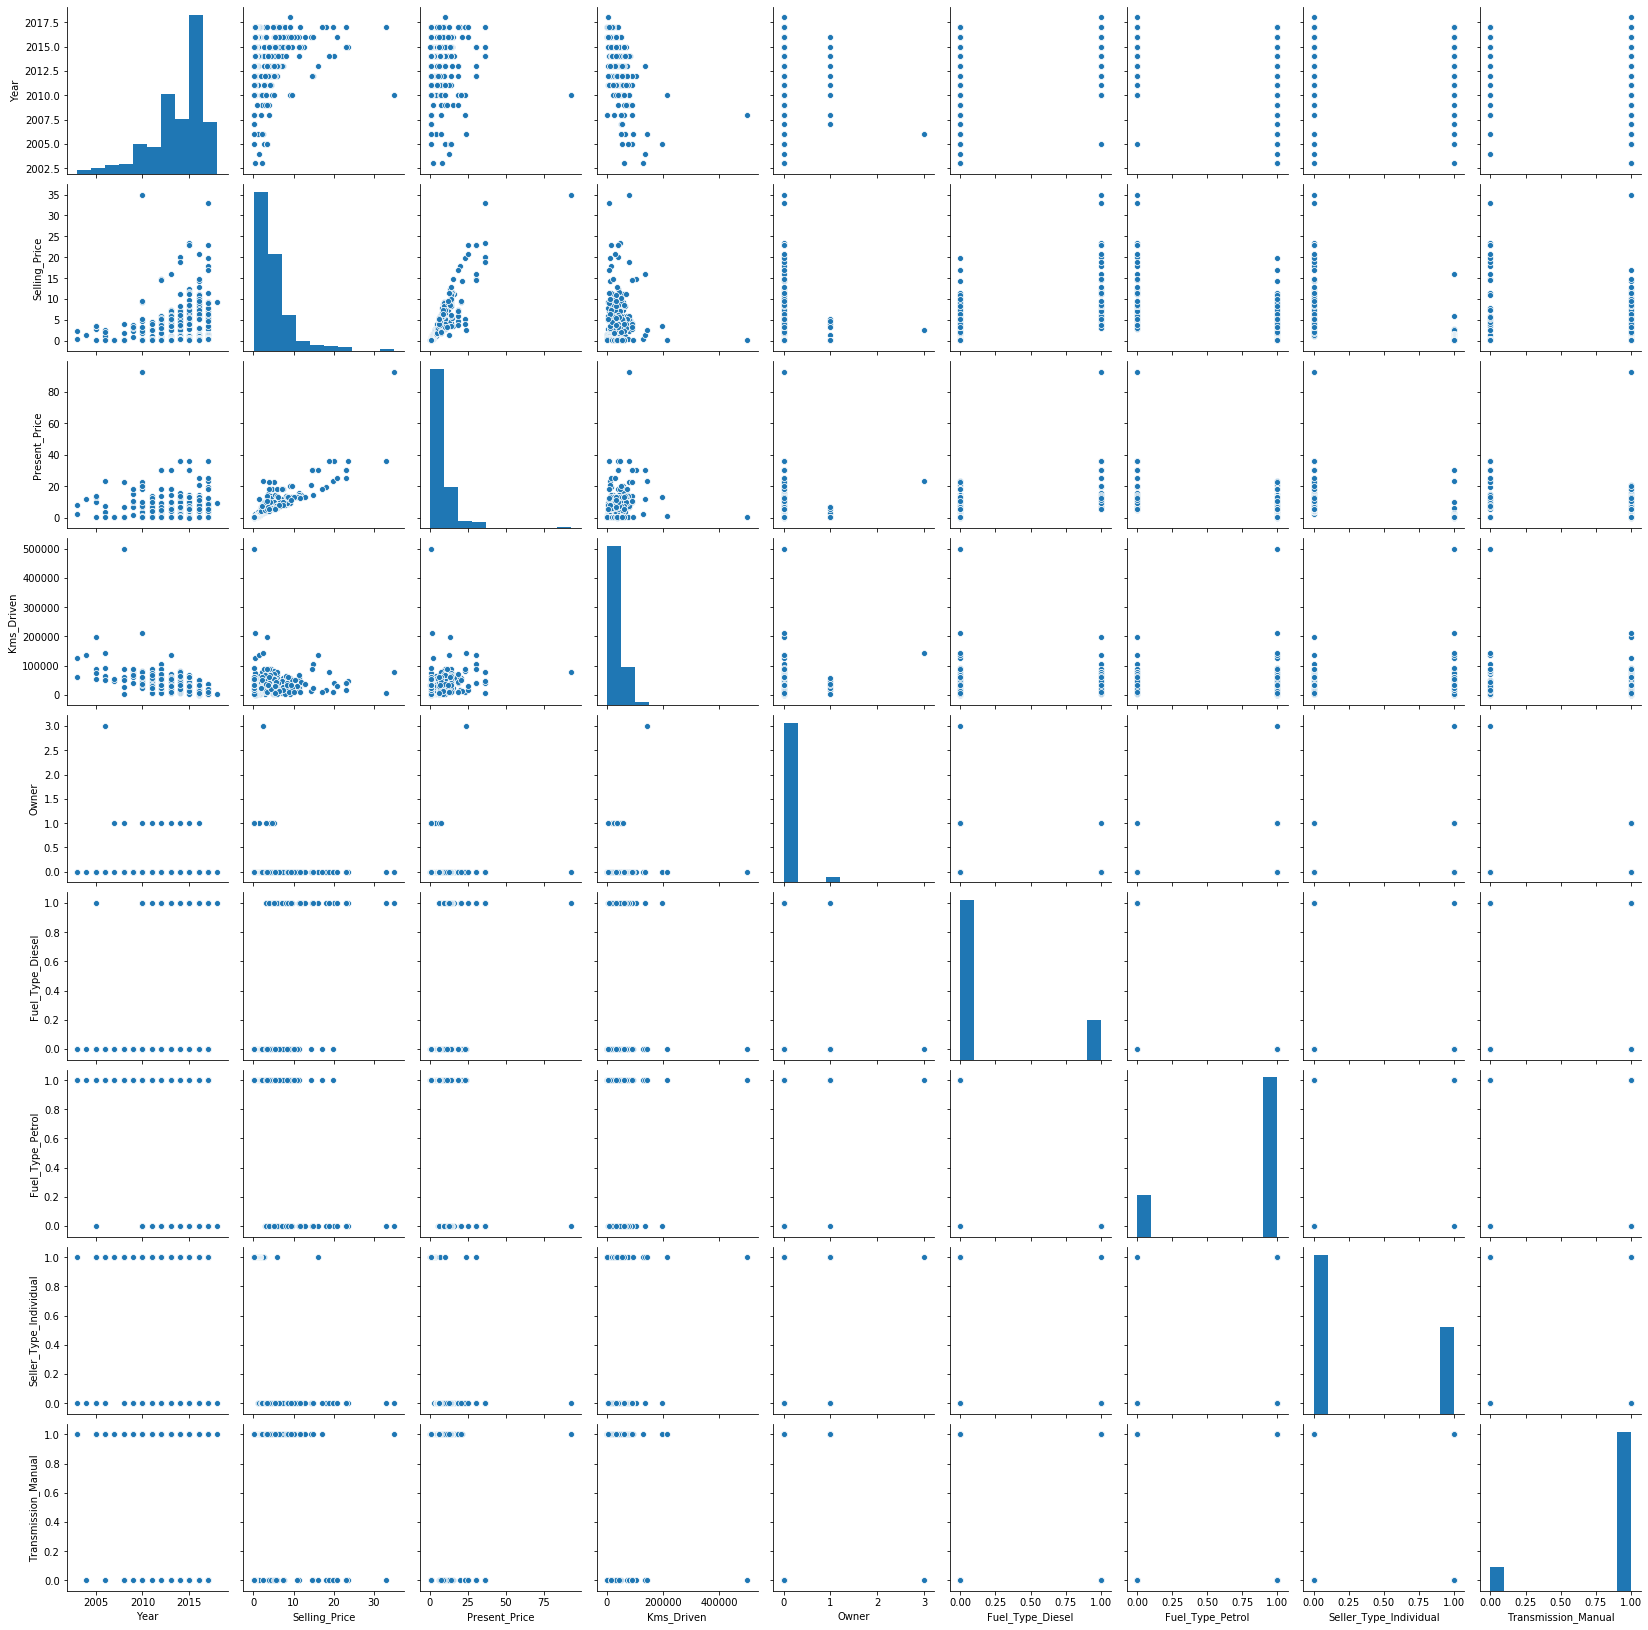

In [45]:
sns.pairplot(df)
plt.figsize = 10
plt.show()

In [ ]:
###  Visualize Correlation Using Heatmap

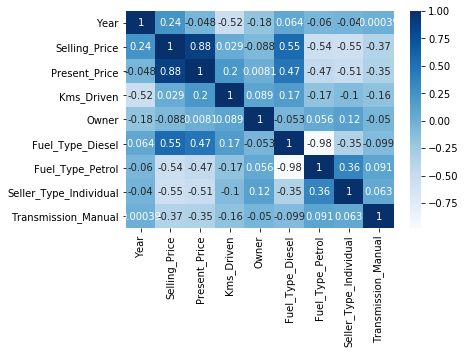

In [41]:
df.corr()

sns.heatmap (df.corr(), annot = True, cmap = 'Blues')

plt.show()

In [ ]:
### Splitting Data into Dependent and Independent 

In [43]:
X = df.drop(columns = 'Selling_Price', axis = 1)

Y = df['Selling_Price']

print(X)

     Year  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0    2014           5.59       27000      0                 0   
1    2013           9.54       43000      0                 1   
2    2017           9.85        6900      0                 0   
3    2011           4.15        5200      0                 0   
4    2014           6.87       42450      0                 1   
..    ...            ...         ...    ...               ...   
296  2016          11.60       33988      0                 1   
297  2015           5.90       60000      0                 0   
298  2009          11.00       87934      0                 0   
299  2017          12.50        9000      0                 1   
300  2016           5.90        5464      0                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1  
1                   0                       0                    1  
2           

In [44]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [ ]:
### Split Data into Training and Testing Data

In [46]:
shuffle = StratifiedShuffleSplit(random_state=51 , test_size=0.2 , n_splits=1)

for train_index , test_index in shuffle.split(df, df['Fuel_Type_Diesel'], df['Fuel_Type_Petrol']):
    X_train_shuffle = df.iloc[train_index]
    X_test_shuffle =  df.iloc[test_index]
X_train_shuffle.shape ,  X_test_shuffle.shape


((240, 9), (61, 9))

In [47]:
X_train = X_train_shuffle.drop(columns = 'Selling_Price')
Y_train = X_train_shuffle['Selling_Price']

X_test = X_test_shuffle.drop(columns = 'Selling_Price')
Y_test = X_test_shuffle['Selling_Price']
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape


((240, 8), (61, 8), (240,), (61,))

In [ ]:
### Apply Hyperparameter Tuning on RandomForestRegressor

In [48]:
### Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)



{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [51]:
### Random search of parameters, using 3 fold cross validation, 
## search across 100 different combinations

rfr = RandomForestRegressor()

rfr = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, scoring = 'neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=51, n_jobs = 1)
rfr.fit(X_train,Y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   2.7s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.6s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=10, max_features=auto, max_depth=25, total=   1.5s
[CV] n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=600, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, total=   2.3s
[CV] n_estimators=600, min_samples_split=2, m

[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   3.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.9s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=10, total=   2.7s
[CV] n_estimators=500, min_samples_split=15

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [ ]:
### Predict Data

In [53]:
pred = rfr.predict(X_test)

print (pred)

[10.21825138  0.46547016  0.70155287  0.36487486 15.96521667  3.00172619
  3.13488492  5.74849879  4.13781651  6.95159678  5.33225516  5.66369159
  0.36269801  6.86463026  3.14370437  8.23791389  9.96025253  1.44180916
  5.12716839  5.13348758  1.26913713 21.144       4.24954704  7.41494643
  6.28429028  3.51069472  3.18922778  1.15039569  2.53164236  5.32039389
  5.64631483  1.89020556 19.65288333  2.52609167  4.32139068  5.03000527
 10.18789808  0.453302    5.40719282 15.82469444  7.30029485  0.48477808
  6.88185426  5.42504585  3.26064359  0.45751507  5.88132716  5.30193026
  5.5907569   0.13184625  3.05500853  1.12208259  2.63624623  3.58527995
  2.81832986  5.13477859  9.71574804  6.06708778  9.88415231  0.31467859
  3.18601687]


In [ ]:
### Evaluation 
### Check R Squared Value

In [54]:
r2_score(pred, Y_test)

0.9663344071184612

In [ ]:
### Display Actual and Predicted Data

In [55]:
pd.DataFrame(np.c_[Y_test , pred] , columns =['Actual' , 'Predicted'])

,Actual,Predicted
0,12.50,10.218251
1,0.50,0.465470
2,0.65,0.701553
3,0.35,0.364875
4,14.90,15.965217
...,...,...
56,9.15,9.715748
57,4.75,6.067088
58,10.25,9.884152
59,0.38,0.314679


In [ ]:
### Visualize Actual & Predicted Data

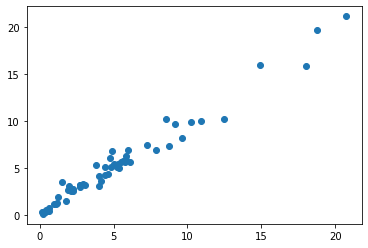

In [64]:
plt.scatter(Y_test, pred)

plt.show()